# Brest Cancer Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype


In [2]:
df = pd.read_csv("../data/Brest_cancer_dataR2.csv")

In [3]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [5]:
df.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [6]:
df2 = df.copy()
df2['Classification'] = df2['Classification'].astype('category')

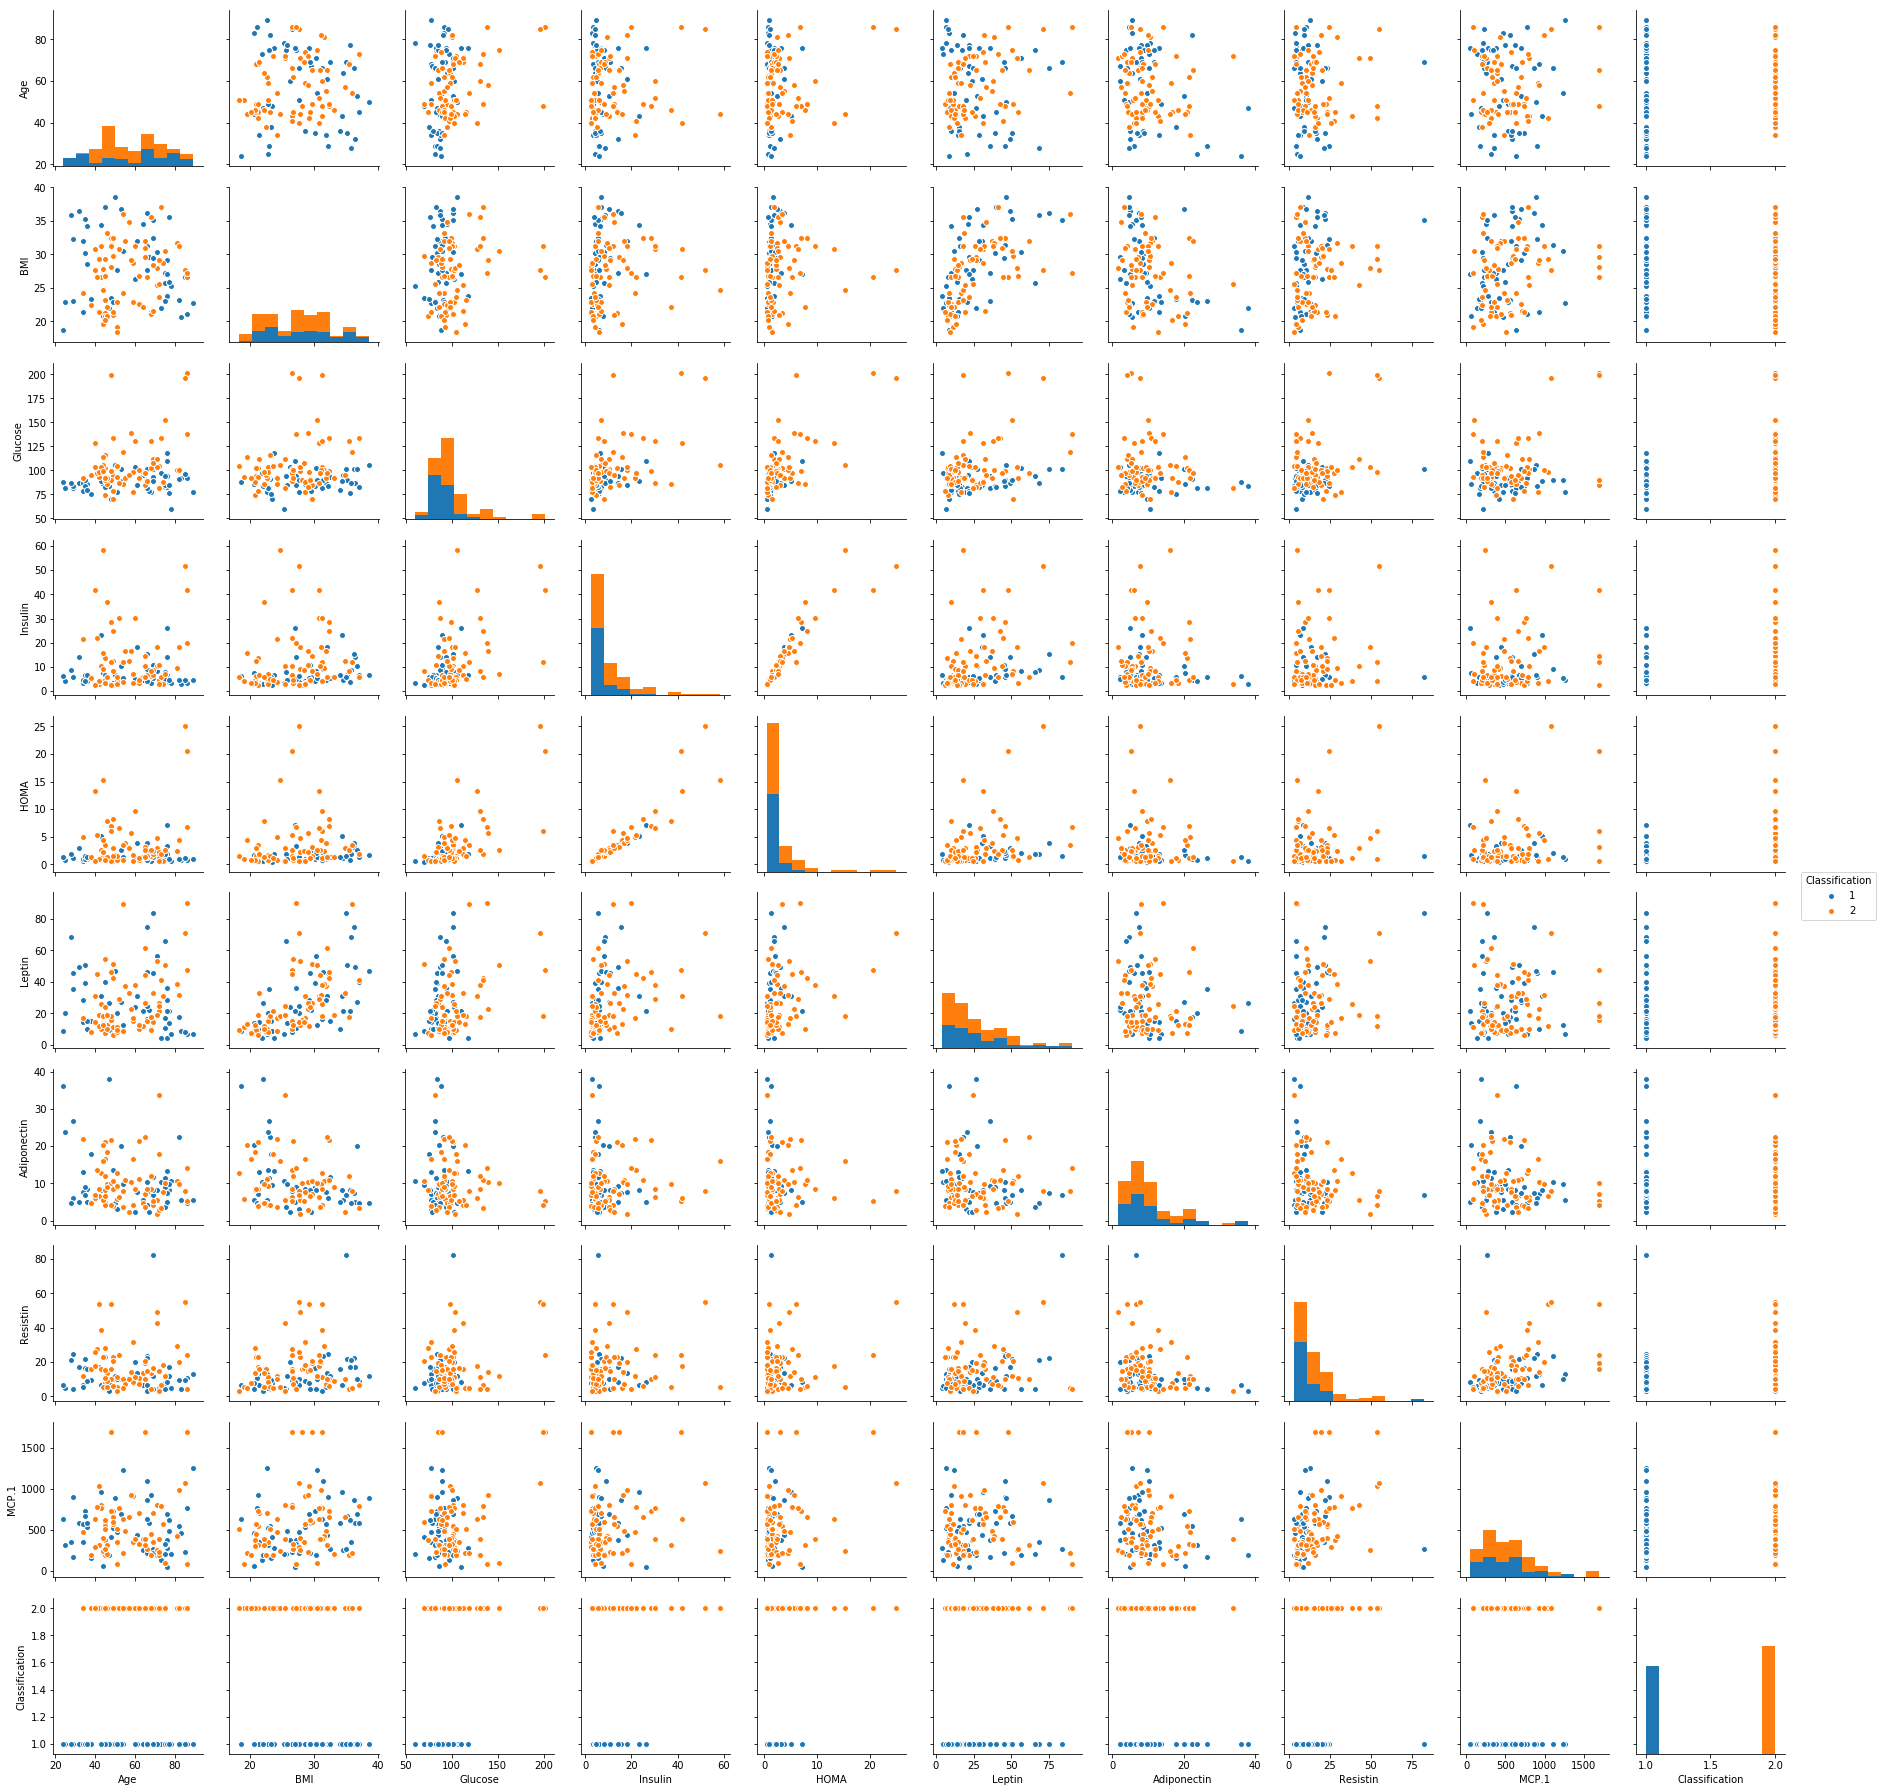

In [7]:
sns.pairplot(df2,hue="Classification")

## k-means

In [14]:
from sklearn.cluster import KMeans

In [15]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.iloc[:,0:8])
    wcss.append(kmeans.inertia_)
    

In [16]:
sns.lineplot(x=range(2, 15), y=wcss)

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [17]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df.iloc[:,0:8])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [18]:
df2['cluster'] = kmeans.labels_

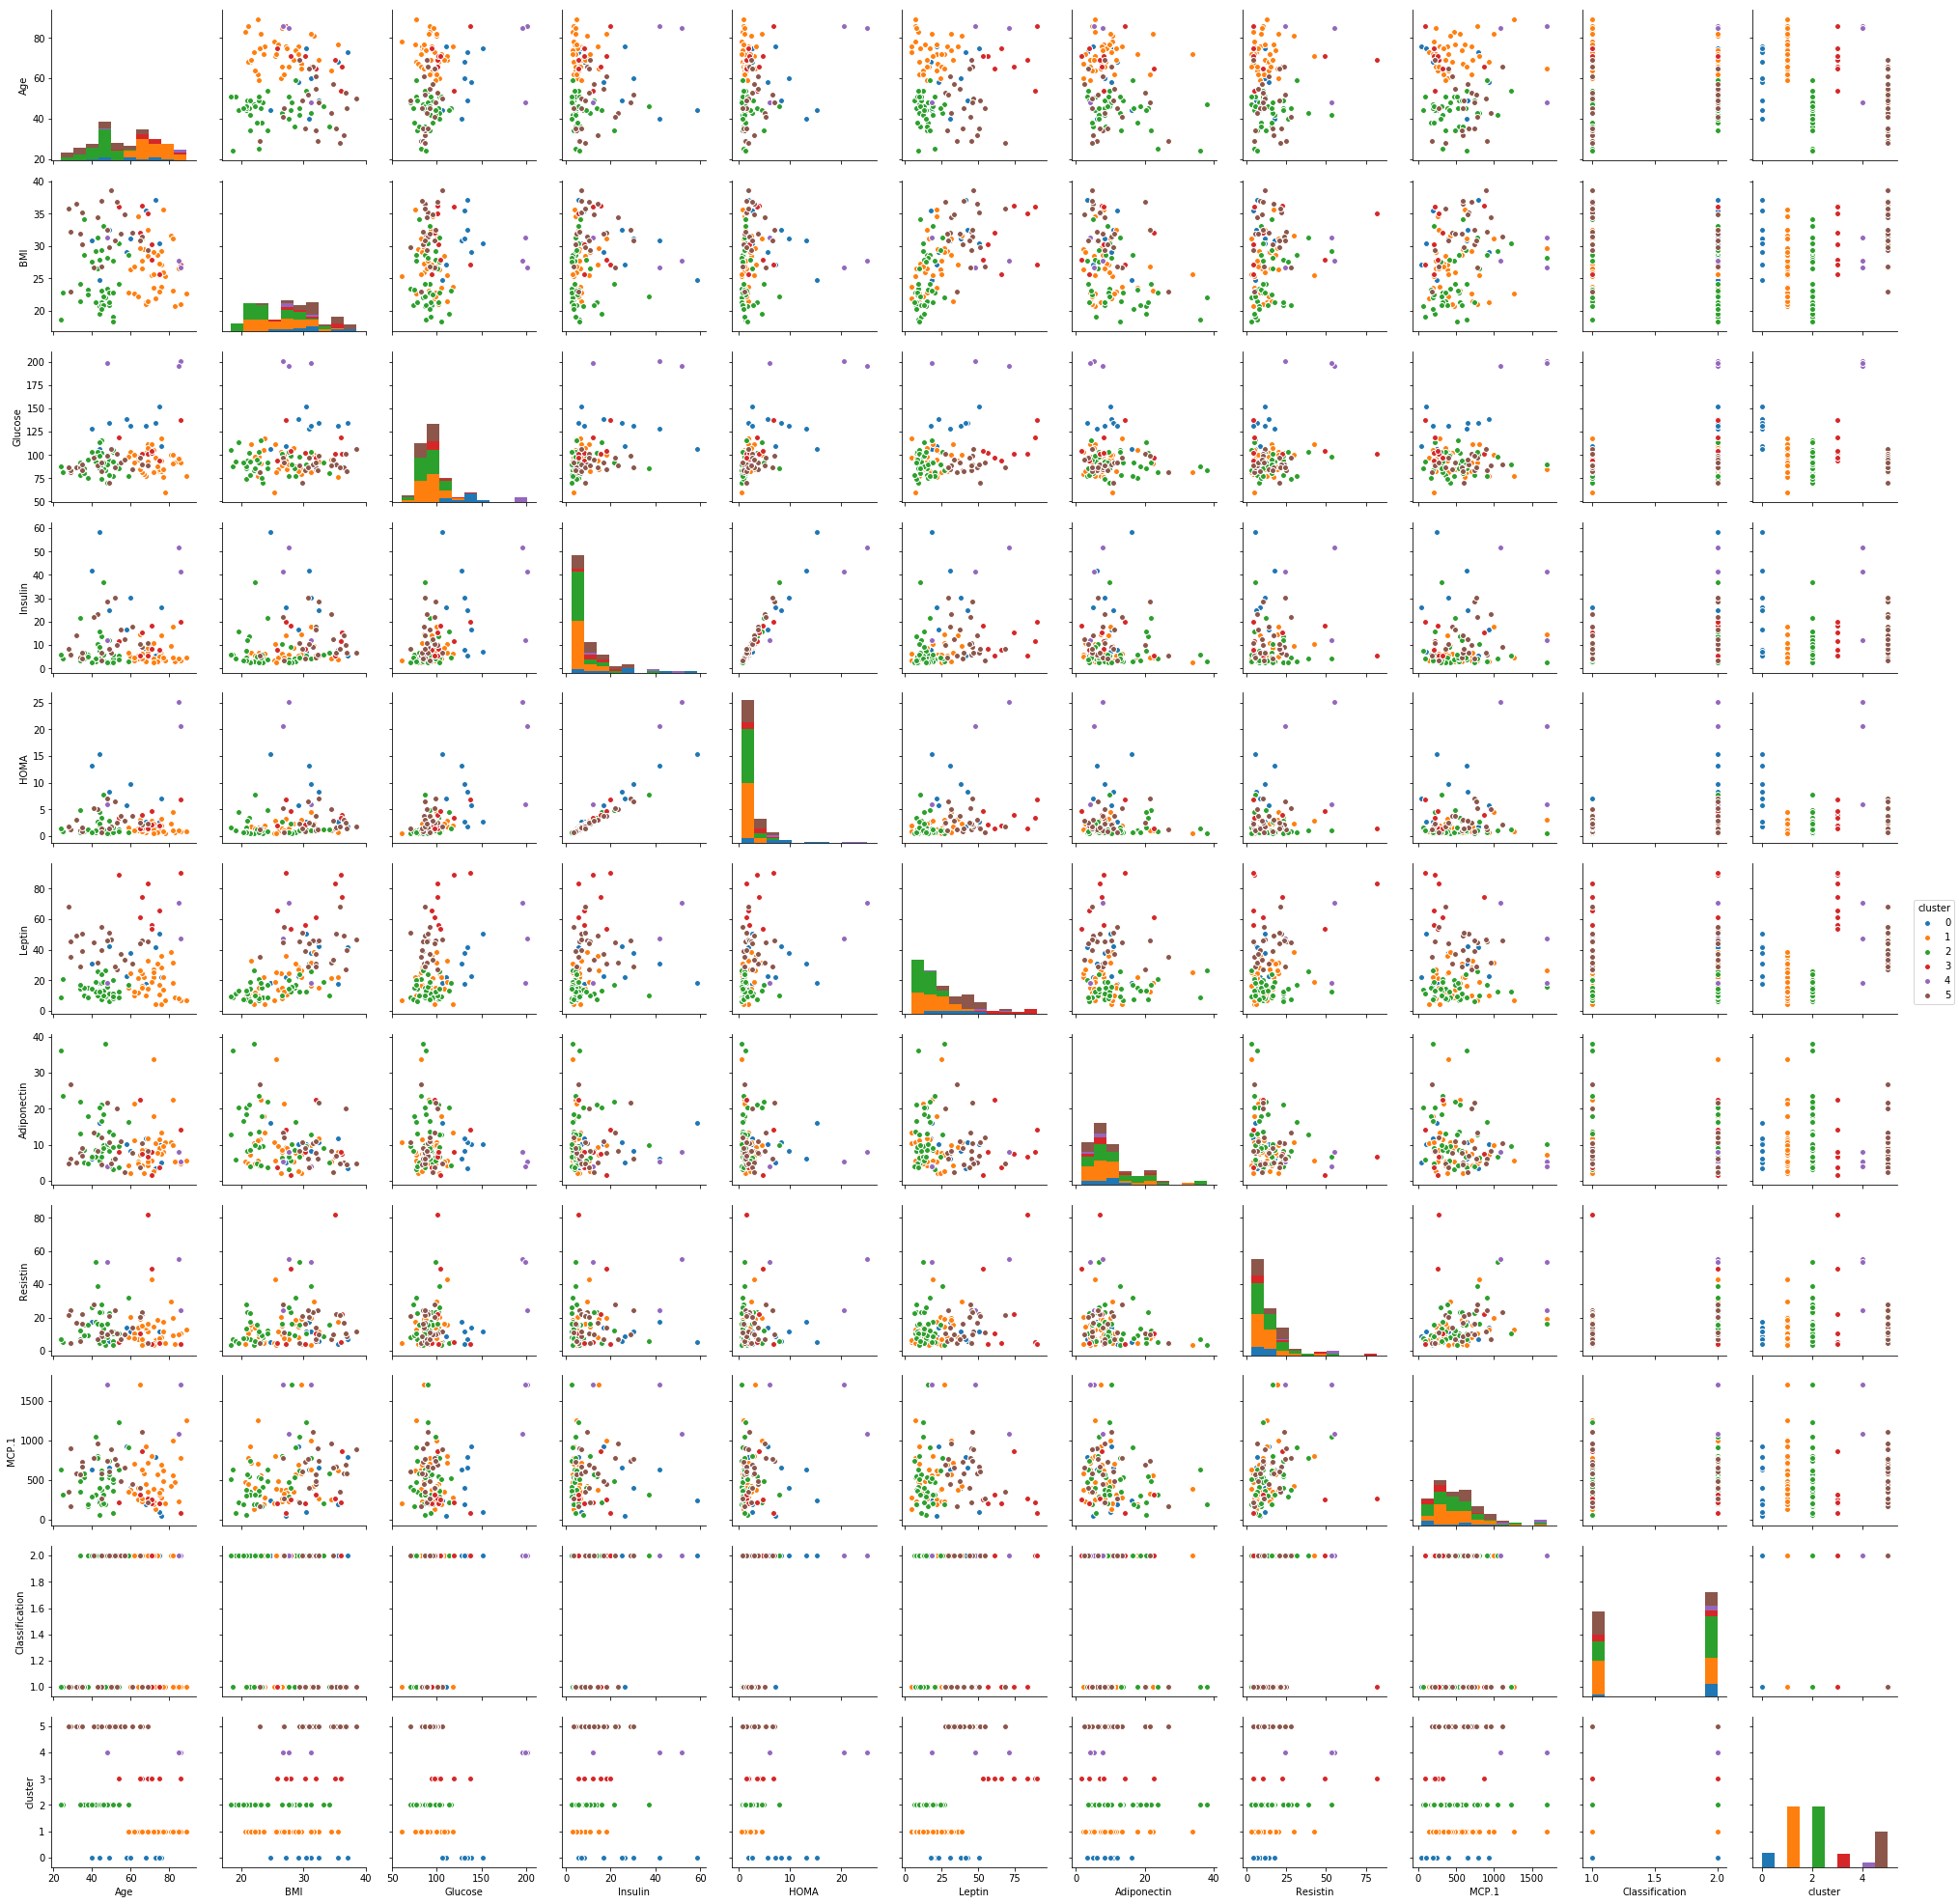

In [19]:
sns.pairplot(df2,hue="cluster")

In [20]:
pd.crosstab(df2.cluster,df2.Classification)

Classification,1,2
cluster,,
0,1,8
1,21,16
2,12,25
3,4,4
4,0,3
5,14,8


In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster

In [22]:
linked = linkage(df.iloc[:,0:8], 'ward')

labelList = range(2, 15)

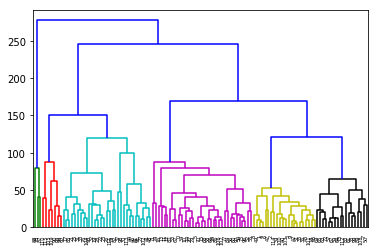

In [23]:
dn = dendrogram(linked,color_threshold=120)


In [24]:
df2['hcluster'] = fcluster(linked, 6, criterion='maxclust')

In [25]:
pd.crosstab(df2.hcluster,df2.Classification)

Classification,1,2
hcluster,,
1,0,3
2,0,7
3,18,13
4,13,22
5,18,4
6,3,15


In [26]:
pd.crosstab(df2.cluster,df2.hcluster)

hcluster,1,2,3,4,5,6
cluster,,,,,,
0,0,5,0,1,0,3
1,0,0,4,0,22,11
2,0,0,0,33,0,4
3,0,2,6,0,0,0
4,3,0,0,0,0,0
5,0,0,21,1,0,0


In [27]:
df2.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,cluster,hcluster
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,2.215517,4.034483
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,1.575939,1.250607
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000,3.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000,4.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,3.000000,5.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,5.000000,6.000000


In [28]:
df2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,cluster,hcluster
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,2,4
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,1,5
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,1,5
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,1,5
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,1,5


# Partition of the data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
nv = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
nc = ['cluster','hcluster']
yv = 'Classification'

In [31]:
X = df2.loc[:,nv]
y = df2.Classification

In [32]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: category
Categories (2, int64): [1, 2]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4)


# Models

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
mod1 = LogisticRegression()
mod1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
yhat1 = mod1.predict(X_train)
yhat1

array([1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1], dtype=int64)

In [38]:
yprob1 = mod1.predict_proba(X_train)
yprob1

array([[5.79764165e-01, 4.20235835e-01],
       [2.89868927e-01, 7.10131073e-01],
       [3.56884689e-01, 6.43115311e-01],
       [3.26472206e-01, 6.73527794e-01],
       [1.68486263e-01, 8.31513737e-01],
       [6.60350106e-01, 3.39649894e-01],
       [8.61435258e-01, 1.38564742e-01],
       [7.04630790e-01, 2.95369210e-01],
       [2.30452854e-01, 7.69547146e-01],
       [7.91129116e-07, 9.99999209e-01],
       [2.58175195e-02, 9.74182480e-01],
       [9.00880448e-01, 9.91195520e-02],
       [6.29179329e-01, 3.70820671e-01],
       [2.87668998e-02, 9.71233100e-01],
       [3.23617029e-06, 9.99996764e-01],
       [2.26224310e-01, 7.73775690e-01],
       [3.90857987e-01, 6.09142013e-01],
       [1.31750599e-01, 8.68249401e-01],
       [1.50034750e-01, 8.49965250e-01],
       [2.63723873e-01, 7.36276127e-01],
       [4.24322131e-01, 5.75677869e-01],
       [8.61551199e-01, 1.38448801e-01],
       [3.07576006e-01, 6.92423994e-01],
       [7.19706141e-01, 2.80293859e-01],
       [2.486664

In [39]:
pd.crosstab(y_train,yhat1)

col_0,1,2
Classification,,
2,7,32
1,19,11


In [40]:
### Accuracy:
mod1.score(X_train,y_train)

0.7391304347826086

In [41]:
### AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, yhat1))
print(roc_auc_score(y_test, yhat2))

ValueError: Data is not binary and pos_label is not specified

In [46]:
yhat2 = mod1.predict(X_test)
print(mod1.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.7446808510638298


col_0,1,2
Classification,,
1,12,10
2,2,23


In [47]:
res = {1:{'model':'Logistic Regression - base model',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Test':mod1.score(X_test,y_test),
           'AUC-train':roc_auc_score(y_train, yhat1),
           'AUC-test':roc_auc_score(y_test, yhat2)
      }}

ValueError: Data is not binary and pos_label is not specified

In [44]:
#res[2] = {'model':'Logistic Regression - base model',
#           'accuracy-Train':mod1.score(X_train,y_train),
#           'accuracy-Test':mod1.score(X_test,y_test),
#           'AUC-train':roc_auc_score(y_train, yhat1),
#           'AUC-test':roc_auc_score(y_test, yhat2)
#      }

In [45]:
res

NameError: name 'res' is not defined